In [615]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [616]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 16})
mlib.rcParams.update({'errorbar.capsize': 2})

In [617]:
!pwd

/c/WinPython-64bit-2.7.9.4/notebooks


In [618]:
# files = !cd provenance & ls *.txt
files =  !ls *.txt
print files

['0_1_10.txt', '0_1_11.txt', '0_1_12.txt', '0_1_2.txt', '0_1_3.txt', '0_1_4.txt', '0_1_5.txt', '0_1_6.txt', '0_1_7.txt', '0_1_8.txt', '0_1_9.txt']


In [619]:
open_files = []
eof = []
for f in files:
    open_files.append(open(f, "r"))  
    eof.append(False)
print len(open_files), "files"

11 files


In [620]:
post_ids = []
pre_app_pops = []
pre_subpops = []
pre_ids = []

global_pre_id = []
global_post_id = []
distance_sq = []

elim_prob = []
removals = []
form_prob = []
formations = []

rem_fails = []
form_fails = []

files_based_removals = {}
files_based_formations = {}

sr_attempts = []
oob= []
dist_sq_control = []

errors = {}

In [621]:
for i in range(len(open_files)):
    files_based_removals[i] = []
    files_based_formations[i] = []
    for line in open_files[i]:
        if not line:
            eof[i] = True
        spleet = str.split(line)
        if "presynaptic subpopulation" in line:
            post_ids.append(int(spleet[4]))
            pre_app_pops.append(int(spleet[6]))
            pre_subpops.append(int(spleet[9]))
            pre_ids.append(int(spleet[-1]))
        elif "g_distance_sq" in line:
            global_pre_id.append([int(spleet[4]), int(spleet[10])])
            global_post_id.append(int(spleet[6]))
            distance_sq.append(int(spleet[8]))
            dist_sq_control.append([int(spleet[8]), int(spleet[-1])])
        elif "elim_prob" in line:
            elim_prob.append([int(spleet[5]), int(spleet[-1])])
        elif "form_prob" in line:
            form_prob.append([int(spleet[4]), int(spleet[7]), int(spleet[9])])
        elif "| RM pre" in line:
            removals.append([int(spleet[6]), int(spleet[8]), int(spleet[13]), int(spleet[-1])])
        elif "| FORM pre" in line:
            formations.append([int(spleet[6]), int(spleet[8]), int(spleet[15]), int(spleet[-1])])
        elif "| FAIL POT" in line or "| FAIL DEP" in line: 
            rem_fails.append(int(spleet[-1]))
            files_based_removals[i].append(int(spleet[-1]))
        elif "| NO FORM" in line:
            form_fails.append(int(spleet[-1]))
            files_based_formations[i].append(int(spleet[-1]))
        elif "sr_attempt" in line:
            sr_attempts.append([int(spleet[4]), int(spleet[5]), int(spleet[7])])  
        
        if "| OOB" in line:
            oob.append([int(spleet[5]), int(spleet[6]), int(spleet[7])])
            form_fails.append(int(spleet[6]))
            
        if "ERROR" in line:
            if len(sr_attempts)> 0:
                if line not in errors:
                        errors[line] = [sr_attempts[-1][0]]
                else:
                        errors[line].append(sr_attempts[-1][0])
            else:
                if line not in errors:
                        errors[line] = 1
                else:
                        errors[line] += 1

In [622]:
for f in open_files:
    f.close()

In [623]:
# errors
print errors.keys()
sr_attempts = np.asarray(sr_attempts)
sr_attempts.shape

['[ERROR]   (topographic_map_impl.c: 557): row is full\n']


(0L,)

In [624]:
post_ids = np.asarray(post_ids)
pre_app_pops = np.asarray(pre_app_pops)
pre_subpops = np.asarray(pre_subpops)
pre_ids = np.asarray(pre_ids)

global_pre_id = np.asarray(global_pre_id)
global_post_id = np.asarray(global_post_id)
distance_sq = np.asarray(distance_sq)

rem_fails = np.asarray(rem_fails)
form_fails = np.asarray(form_fails)
sr_attempts = np.asarray(sr_attempts)

oob=np.asarray(oob)
dist_sq_control=np.asarray(dist_sq_control)

elim_prob = np.asarray(elim_prob)

In [625]:
formations = np.asarray(formations)
removals = np.asarray(removals)
sr_attempts = np.asarray(sr_attempts)

In [626]:
for key in errors.keys():
#     print key, len(errors[key])
    print key, errors[key]


[ERROR]   (topographic_map_impl.c: 557): row is full
1331


In [627]:
data = np.asarray(pre_subpops)

In [628]:
data[data==0].size

0

In [629]:
global_pre_id

array([[ 26,   1],
       [188,   1],
       [150,   1],
       ..., 
       [188,   1],
       [ 76,   0],
       [133,   0]])

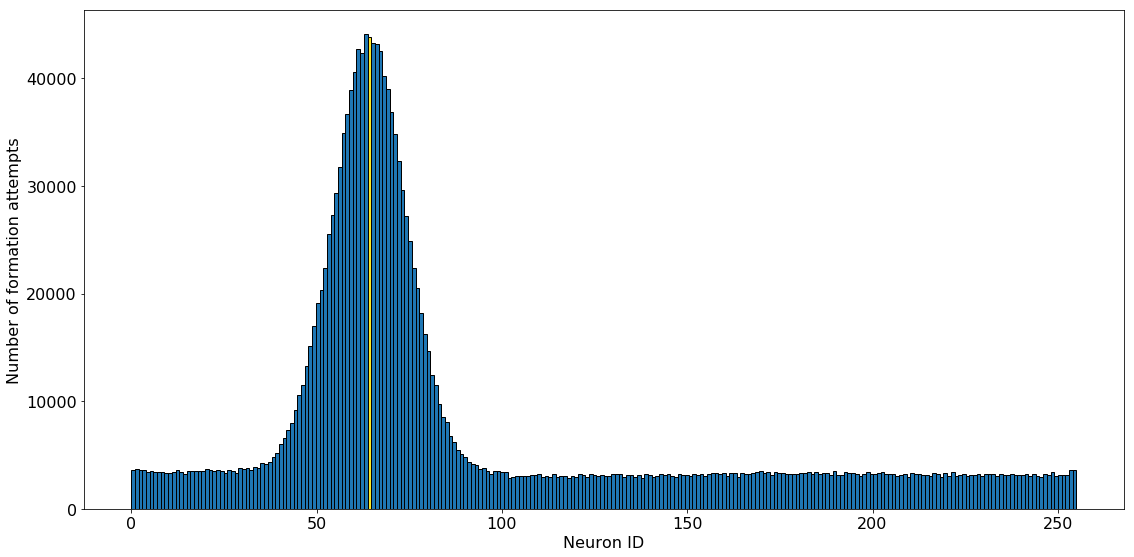

In [630]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=800)
d = np.unique(global_pre_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
N, bins, patches = ax1.hist(global_pre_id[global_pre_id[:,1]==0][:,0], bins=d.size, edgecolor='black')
vir = plt.get_cmap('viridis', 3)

ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of formation attempts")

patches[64].set_facecolor(vir(3))

# Uncomment this if bimodal input distribution
# patches[3*256//4].set_facecolor(vir(3))

plt.tight_layout()
plt.savefig("potential_partner_pre_id_for_formation.png")

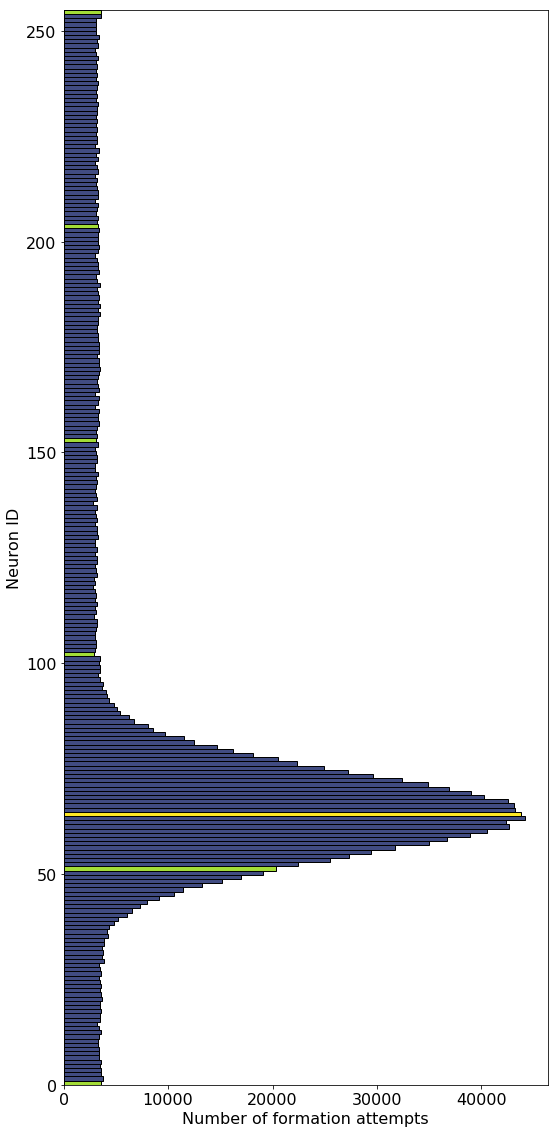

In [631]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8, 16), dpi=800)
d = np.unique(global_pre_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
N, bins, patches = ax1.hist(global_pre_id[global_pre_id[:,1]==0][:,0], bins=d.size, orientation=u'horizontal', edgecolor='black')
vir = plt.get_cmap('viridis', 6)

ax1.set_ylabel("Neuron ID")
ax1.set_xlabel("Number of formation attempts")
for patch in patches:
    patch.set_facecolor('#414C82')
    
patches[64].set_facecolor(vir(6))

for i in range(6):
    patches[i * 51].set_facecolor('#A3DC37')

ax1.set_ylim([0,255])
# Uncomment this if bimodal input distribution
# patches[3*256//4].set_facecolor(vir(3))

plt.tight_layout()
plt.savefig("potential_partner_pre_id_for_formation_horizontal.png")

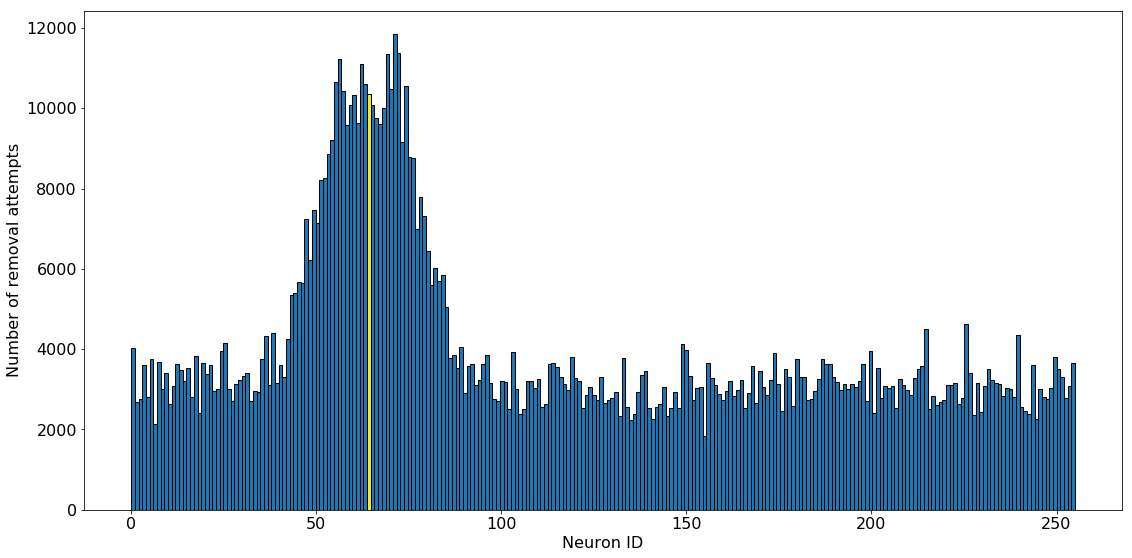

In [635]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_pre_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
N, bins, patches = ax1.hist(global_pre_id[global_pre_id[:,1]==1][:,0], bins=d.size, edgecolor='black')

ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of removal attempts")

vir = plt.get_cmap('viridis', 3)
patches[64].set_facecolor(vir(3))

# Uncomment this if bimodal input distribution
# patches[3*256//4].set_facecolor(vir(3))

plt.tight_layout()
plt.savefig("potential_partner_pre_id_for_removal.png")

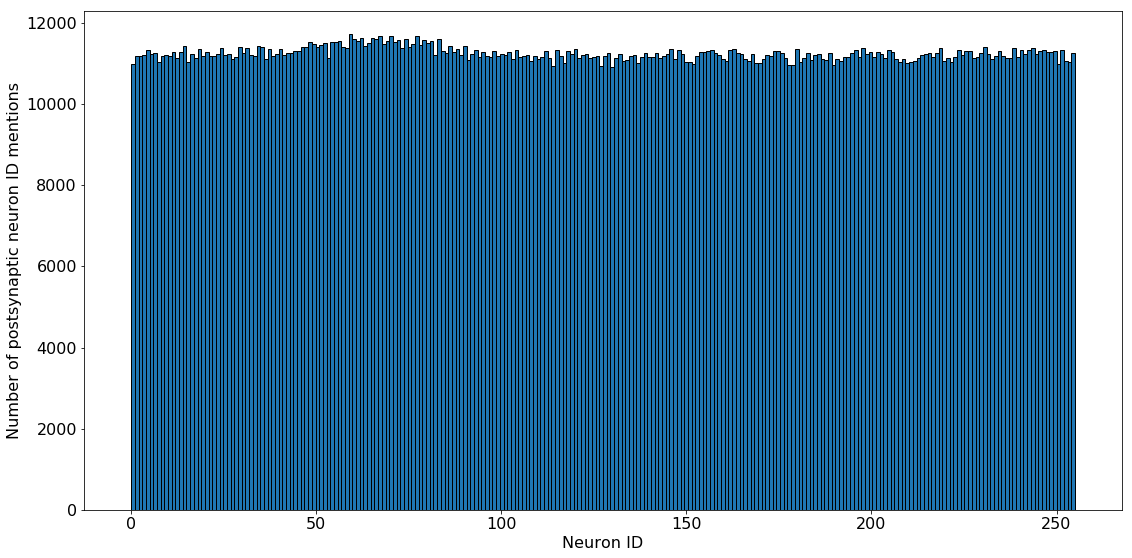

In [636]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_post_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of postsynaptic neuron ID mentions")

ax1.hist(global_post_id, bins=d.size, edgecolor='black')

plt.tight_layout()
plt.savefig("potential_partner_post_id.png")

(array([  2.75589336e-03,   1.87989461e-04,   1.47377659e-04,
          1.10537344e-04,   1.13078998e-04,   7.79495159e-05,
          8.28305844e-05,   8.04392435e-05,   8.47463901e-05,
          8.50934762e-05,   8.66813266e-05,   8.64408260e-05,
          4.30714666e-05,   8.73782317e-05,   4.35715985e-05,
          8.92175145e-05,   4.37656387e-05,   4.40225371e-05,
          8.86709223e-05,   4.52086422e-05,   4.48178288e-05,
          4.51977103e-05,   9.12207749e-05,   4.38230309e-05,
          4.45499986e-05,   4.61815763e-05,   4.57934959e-05,
          4.55365975e-05,   4.55721260e-05,   4.37875024e-05,
          4.51512500e-05,   4.43340946e-05,   4.50036701e-05,
          4.63209574e-05,   4.43860209e-05,   4.59793372e-05,
          4.55693931e-05,   4.68019585e-05,   4.50665282e-05,
          4.50801930e-05,   4.66188501e-05,   4.42712365e-05,
          0.00000000e+00,   4.45390667e-05,   4.39268834e-05,
          4.47249081e-05,   4.46210556e-05,   4.57142400e-05,
        

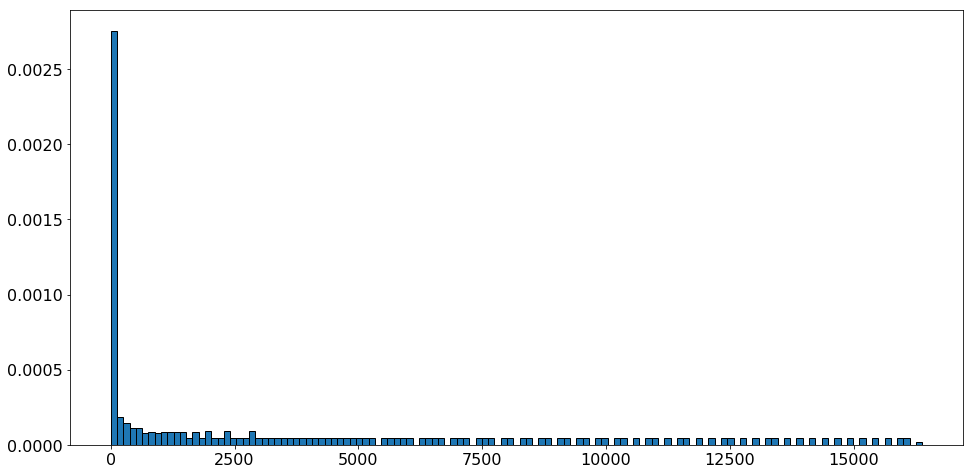

In [634]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(distance_sq)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(distance_sq, bins=d.size,edgecolor='black', normed=1)

In [518]:
dist = np.sqrt(distance_sq)
m = np.mean(dist)
std = np.std(dist)

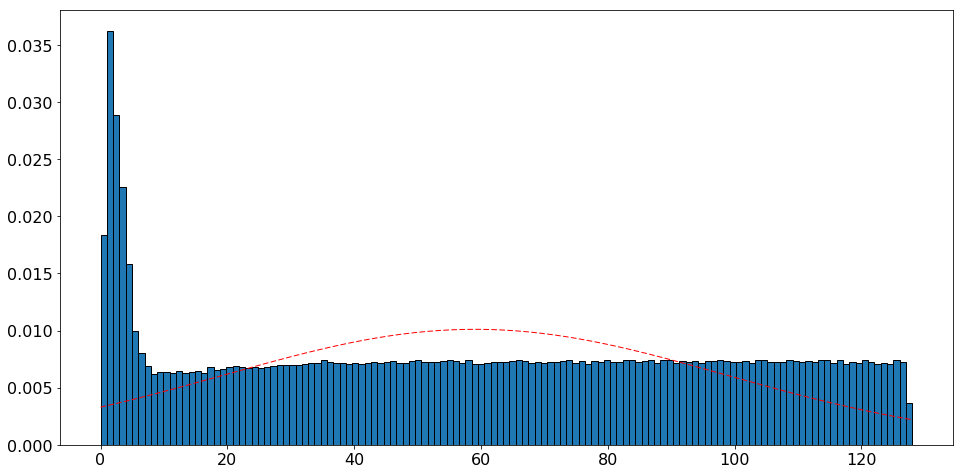

In [519]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(np.sqrt(distance_sq))
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(np.sqrt(distance_sq), bins=d.size,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

In [593]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
#     delta = np.where(delta > grid * .5, delta - grid, delta)
#     print delta, grid
    if delta[0] > grid[0] * .5 and grid[0] > 0:
        delta[0] -= grid[0]
        
    if delta[1] > grid[1] * .5 and grid[1] > 0:
        delta[1] -= grid[1]

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

def index_to_dist(i1, i2, grid):
    if grid[0] > 1:
        pre = (i1//grid[0], i1%grid[1])
        post = (i2//grid[0], i2%grid[1])
    else:
        pre = (0, i1%grid[1])
        post = (0, i2%grid[1])
    
    return distance(pre,post, grid=grid, type='euclidian')

In [594]:
layer_size = 256
grid_layout = np.asarray((1, 256))

In [595]:
for i in np.arange(global_post_id.size):
    assert np.round(index_to_dist(global_pre_id[i,0], global_post_id[i], grid_layout)**2) == distance_sq[i], \
    "{} vs {}".format(np.round(index_to_dist(global_pre_id[i, 0], global_post_id[i], grid_layout)**2),  distance_sq[i])

In [637]:
counts = np.ones((layer_size, layer_size)) * np.nan

In [638]:
wombo_combo = np.concatenate((global_post_id.reshape(1, global_post_id.shape[0]), global_pre_id[:,0].reshape(1, global_pre_id.shape[0]), global_pre_id[:,1].reshape(1, global_pre_id.shape[0])), axis=0).T

In [639]:
wombo_combo.shape

(2880954L, 3L)

In [640]:
for i in np.arange(global_post_id.size):
    if np.isnan(counts[global_pre_id[i,0], global_post_id[i]]):
        counts[global_pre_id[i,0], global_post_id[i]] = 1
    else:
        counts[global_pre_id[i,0], global_post_id[i]] += 1

(1845844L, 2L)


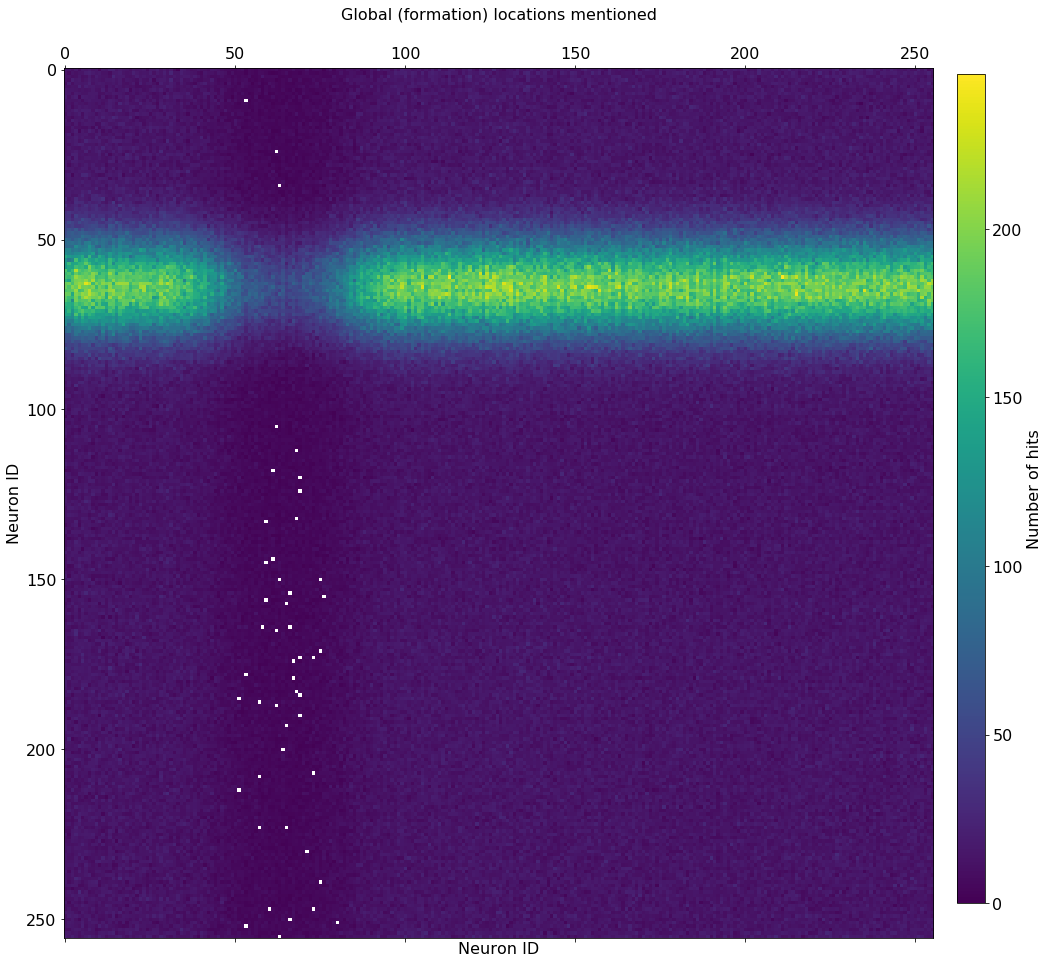

In [641]:
form_combos = wombo_combo[wombo_combo[:,2]==0][:,:2]
print form_combos.shape
form_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(form_combos.shape[0]):
    if np.isnan(form_counts[form_combos[i,1], form_combos[i,0]]):
        form_counts[form_combos[i,1], form_combos[i,0]] = 1
    else:
        form_counts[form_combos[i,1], form_combos[i,0]] += 1
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(form_counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Global (formation) locations mentioned", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)

plt.savefig("global_mentions_formations.png")

(1035110L, 2L)


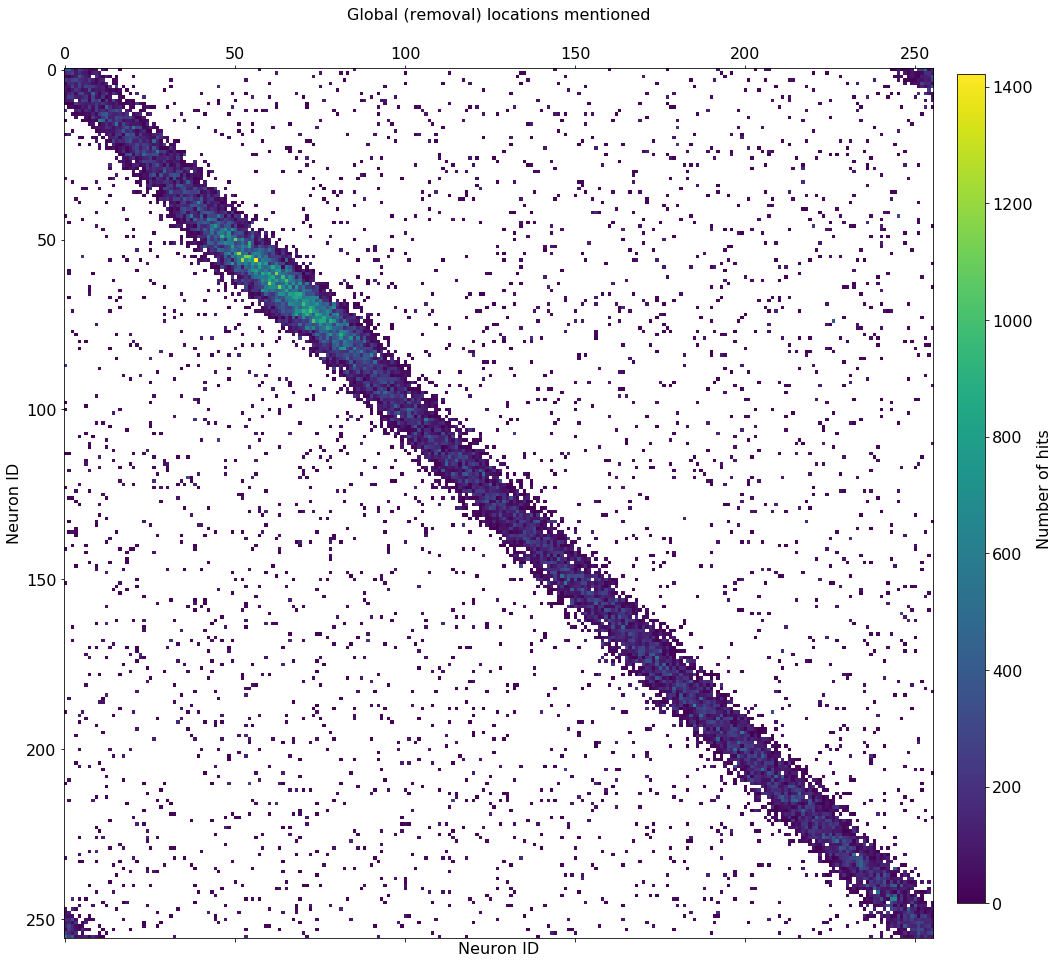

In [642]:
rem_combos = wombo_combo[wombo_combo[:,2]==1][:,:2]
print rem_combos.shape
rem_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(rem_combos.shape[0]):
    if np.isnan(rem_counts[rem_combos[i,1], rem_combos[i,0]]):
        rem_counts[rem_combos[i,1], rem_combos[i,0]] = 1
    else:
        rem_counts[rem_combos[i,1], rem_combos[i,0]] += 1
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(rem_counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Global (removal) locations mentioned", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)

plt.savefig("global_mentions_removals.png")

In [643]:
print "total rewire attempts", np.nansum(counts)

total rewire attempts 2880954.0


In [644]:
print "hit locations", np.count_nonzero(np.isfinite(counts))

hit locations 65493


In [645]:
print "surface coverage", np.count_nonzero(np.isfinite(counts)) * 100. / counts.size 

surface coverage 99.934387207


In [646]:
elim_prob = np.asarray(elim_prob)
removals= np.asarray(removals)
form_prob= np.asarray(form_prob)
formations = np.asarray(formations)

In [647]:
formation_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(formations.shape[0]):
    if np.isnan(formation_counts[formations[i, 0], formations[i, 1]]):
        formation_counts[formations[i, 0], formations[i, 1]] = 1
    else:
        formation_counts[formations[i, 0], formations[i, 1]] += 1

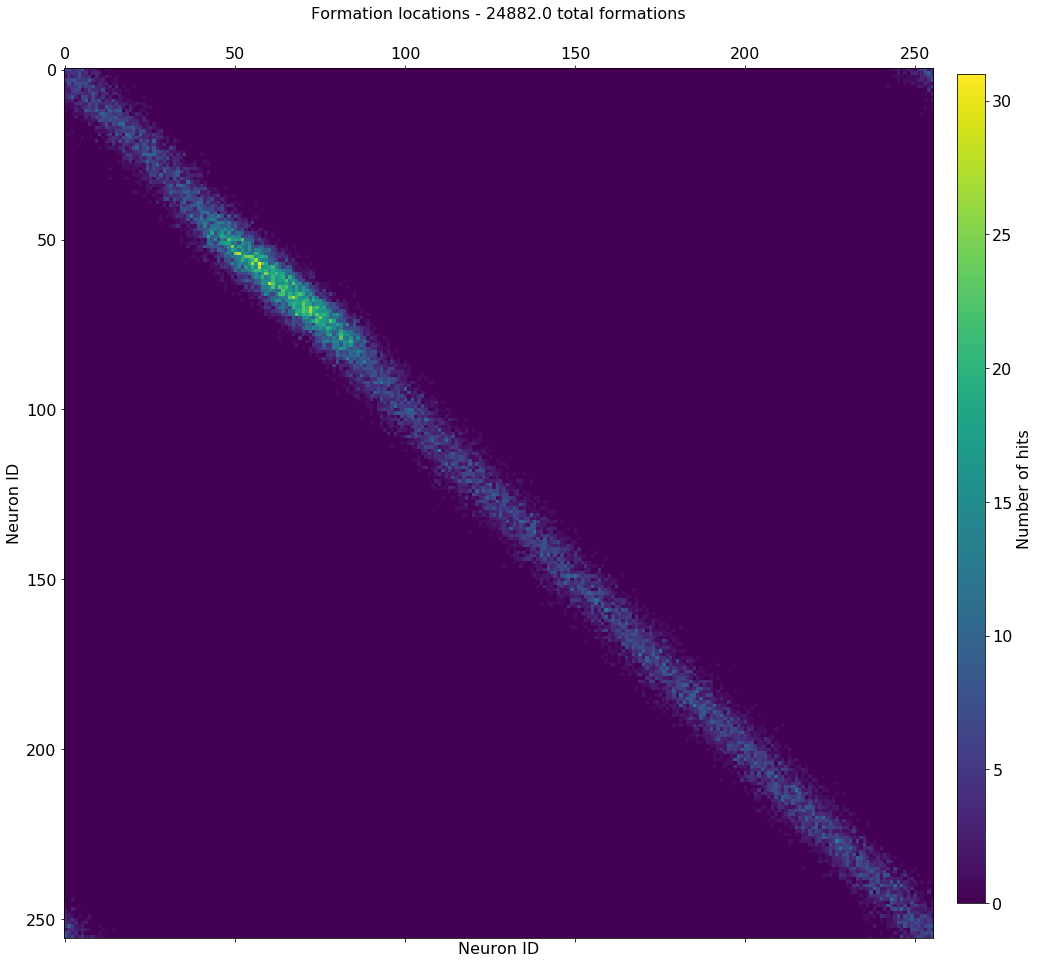

In [648]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(np.nan_to_num(formation_counts), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Formation locations - " 
              + str(np.sum(formation_counts[np.isfinite(formation_counts)])) 
              + " total formations" , fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)
plt.savefig("form_hits.png")

In [649]:
print "Total number of formations", np.sum(formation_counts[np.isfinite(formation_counts)])

Total number of formations 24882.0


In [650]:
np.sum(np.isfinite(formation_counts))

5589

In [651]:
deletion_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(removals.shape[0]):
    if np.isnan(deletion_counts[removals[i, 0], removals[i, 1]]):
        deletion_counts[removals[i, 0], removals[i, 1]] = 1
    else:
        deletion_counts[removals[i, 0], removals[i, 1]] += 1

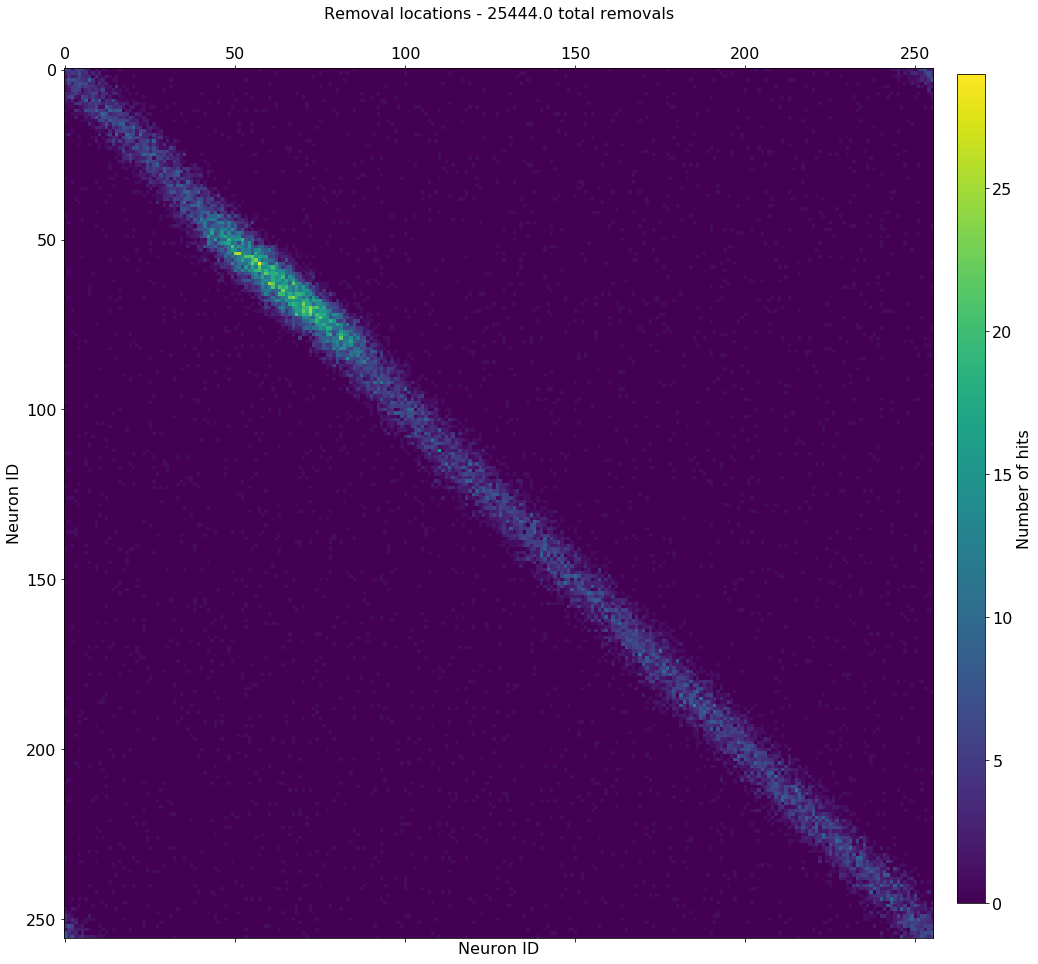

In [652]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(np.nan_to_num(deletion_counts), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Removal locations - " 
              + str(np.sum(deletion_counts[np.isfinite(deletion_counts)])) 
              + " total removals" , fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)
plt.savefig("removal_hits.png")

In [653]:
print "Total number of removals", np.sum(deletion_counts[np.isfinite(deletion_counts)])

Total number of removals 25444.0


In [654]:
np.argmax(deletion_counts[np.isfinite(deletion_counts)])

1915

In [655]:
print "Cancer" 
for key in errors.keys():
    print key, errors[key]
    print key, len(errors[key])

Cancer
[ERROR]   (topographic_map_impl.c: 557): row is full
1331
[ERROR]   (topographic_map_impl.c: 557): row is full


TypeError: object of type 'int' has no len()

In [115]:
p_elim_dep = 0.0245 * (2**32)
p_elim_pot = 1.36 * 10 ** -4 * (2**32)

IndexError: too many indices for array

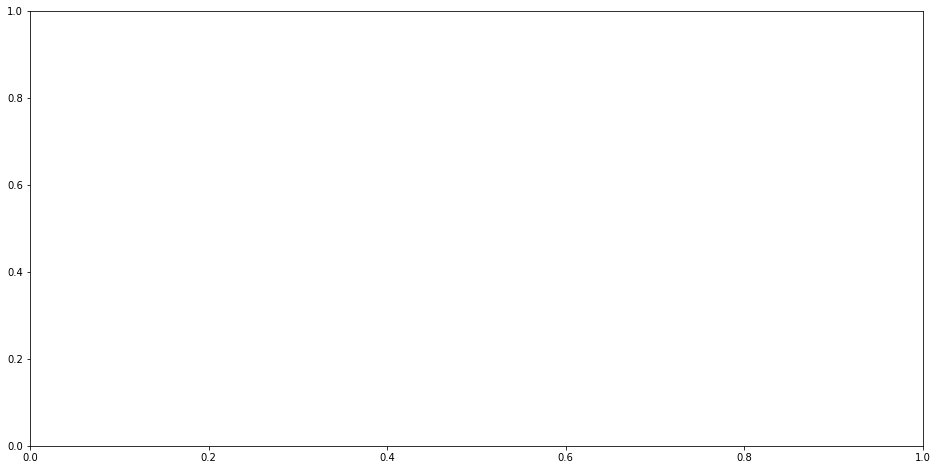

In [116]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(elim_prob[:, 0])
ax1.axhline(p_elim_pot, ls='-', c='g')
ax1.axhline(p_elim_dep, ls=':', c='r')

In [247]:
print "min elim probability (uint16)", np.min(elim_prob[:,0])
print "max elim probability (uint32)", np.max(elim_prob[:,0]), "vs MAXUINT32", 2**32

min elim probability (uint16)

IndexError: too many indices for array

IndexError: too many indices for array

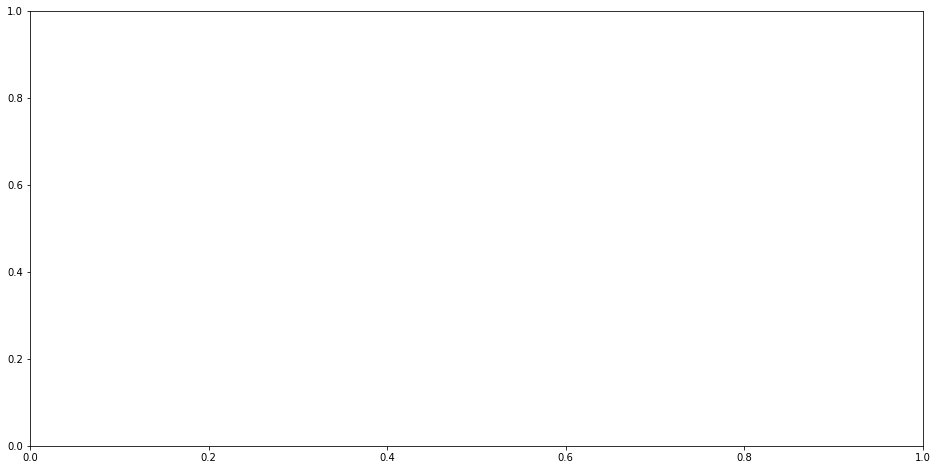

In [248]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d=np.unique(elim_prob[:,0])
ax1.hist(elim_prob[:, 0], bins=d.size, edgecolor='black', normed=1)

IndexError: too many indices for array

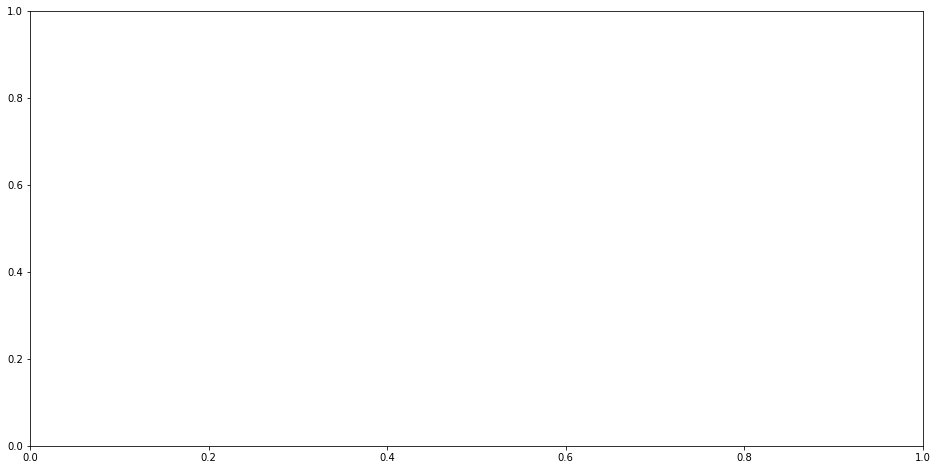

In [134]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(form_prob[:, 0])

IndexError: too many indices for array

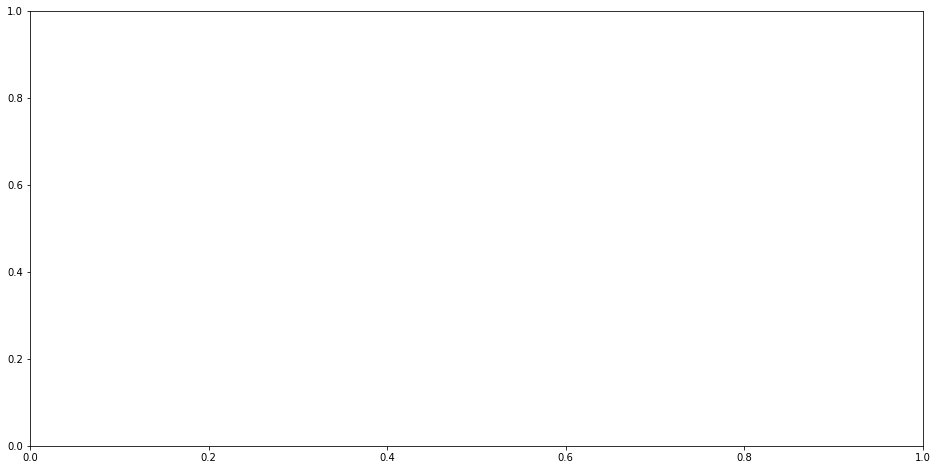

In [135]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(form_prob[:, 1])

In [136]:
print "min form probability (uint16)", np.min(form_prob[:, 1])
print "max form probability (uint16)", np.max(form_prob[:, 1]), "vs MAXUINT16", 2**16-1

 min form probability (uint16)

IndexError: too many indices for array

IndexError: too many indices for array

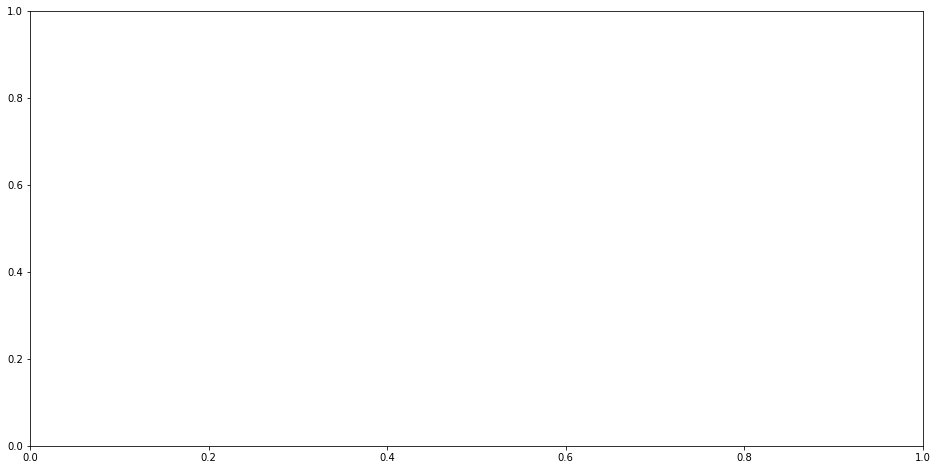

In [137]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d=np.unique(form_prob[:,0])
ax1.hist(form_prob[:, 0], bins=d.size, edgecolor='black', normed=1)

In [138]:
# Formation control
formation_prob_controls = form_prob[:, -1]
print formation_prob_controls.shape

IndexError: too many indices for array

NameError: name 'formation_prob_controls' is not defined

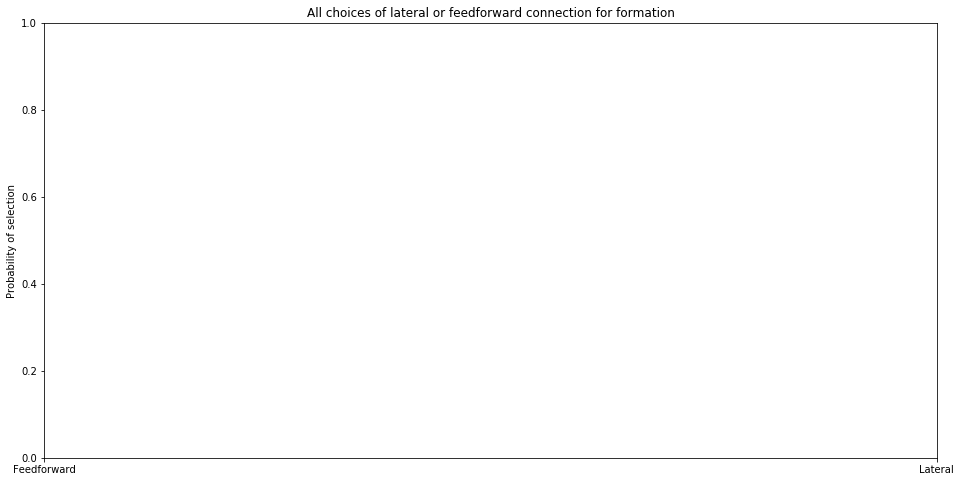

In [139]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("All choices of lateral or feedforward connection for formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(formation_prob_controls)
ax1.hist(formation_prob_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [73]:
actual_formation_controls = formations[:, 2]
print actual_formation_controls.shape

(472L,)


(array([ 1.]), array([-0.5,  0.5]), <a list of 1 Patch objects>)

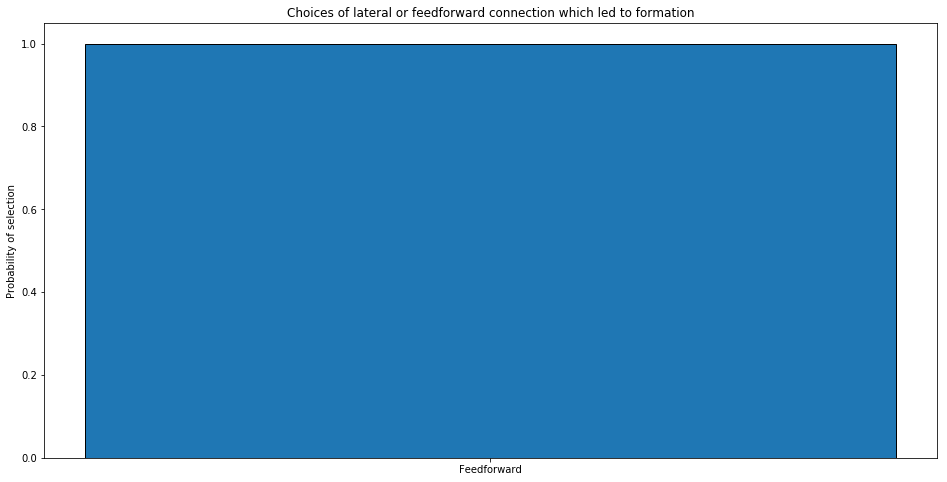

In [74]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Choices of lateral or feedforward connection which led to formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(actual_formation_controls)
ax1.hist(actual_formation_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

(array([ 1.]), array([-0.5,  0.5]), <a list of 1 Patch objects>)

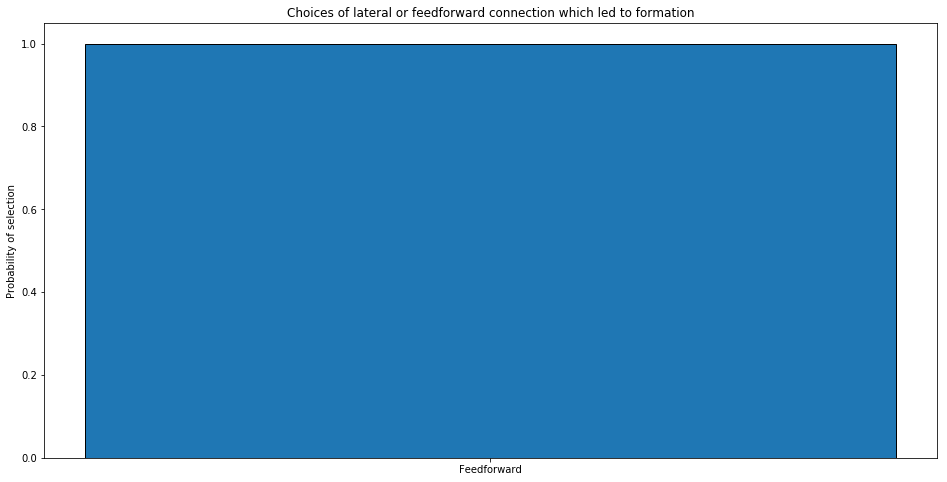

In [75]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Choices of lateral or feedforward connection which led to formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(actual_formation_controls)
ax1.hist(actual_formation_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [76]:
# sanity checks -- the times in rem_fails and form_fails do not repeat and monotonically increase

In [77]:
sorted_rem_fails = np.sort(rem_fails)
assert all(np.diff(sorted_rem_fails) > 0)

In [78]:
sorted_form_fails = np.sort(form_fails)
assert all(np.diff(sorted_form_fails) > 0)

In [79]:
sorted_form_fails[1]

IndexError: index 1 is out of bounds for axis 0 with size 0

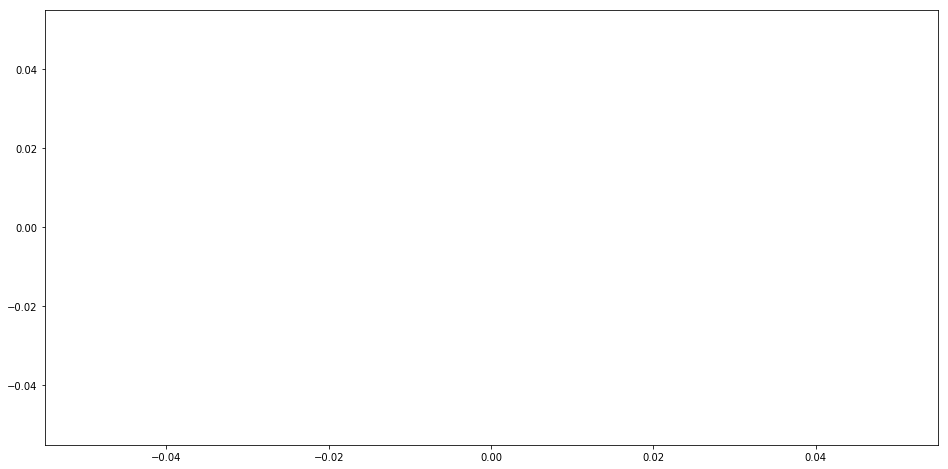

In [80]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(rem_fails)

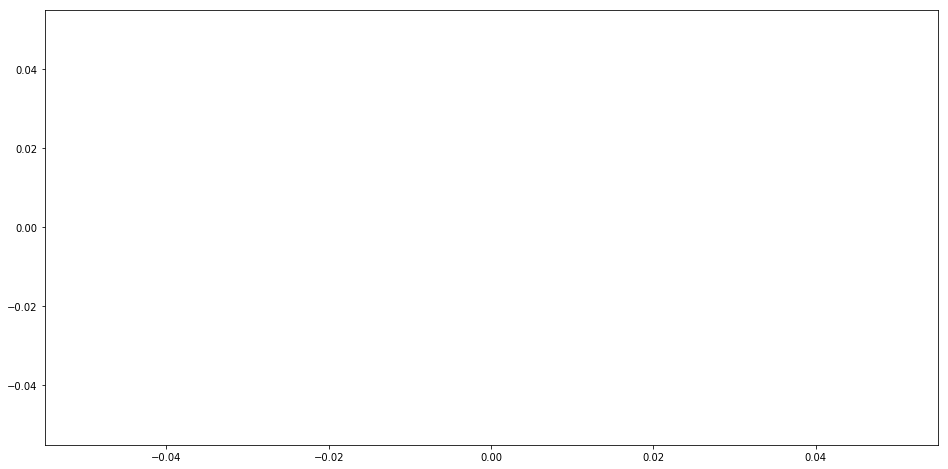

In [81]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(form_fails)

In [82]:
rem_fails.size 

0

In [83]:
form_fails.size

0

In [84]:
oob.shape[0]

0L

In [85]:
total_failures = rem_fails.size  + form_fails.size + oob.shape[0]

In [86]:
print "RM percentage failures of total failures", rem_fails.size * 100. / total_failures

RM percentage failures of total failures

ZeroDivisionError: float division by zero

In [87]:
print "FORM percentage failures of total failures", form_fails.size * 100. / total_failures

 FORM percentage failures of total failures

ZeroDivisionError: float division by zero

In [88]:
print "OOB percentage failures of total failures", oob.shape[0] * 100. / total_failures

 OOB percentage failures of total failures

ZeroDivisionError: float division by zero

In [89]:
for key in files_based_removals.keys():
    times = np.asarray(files_based_removals[key])
    assert all(np.diff(times) > 0)

In [90]:
for key in files_based_removals.keys():
    times = np.asarray(files_based_formations[key])
    assert all(np.diff(times) > 0)

In [91]:
# check if putting together all times I can reconstruct the entire simulations 
hardcoded_simtime = 30000000
all_times = np.arange(hardcoded_simtime)

In [92]:
assert all(all_times - np.sort(sr_attempts[:,0]) ==0)
assert all(np.diff(np.sort(sr_attempts[:,0])) > 0)

IndexError: too many indices for array

In [93]:
sr_attempts.shape

(0L,)

In [94]:
total_rewiring_attempts = sr_attempts.shape[0]

In [95]:
print "Successful removals of total rewiring attempts", (removals.shape[0] * 100.) / total_rewiring_attempts

Successful removals of total rewiring attempts

ZeroDivisionError: float division by zero

In [96]:
print "Successful formations of total rewiring attempts", formations.shape[0] * 100. / total_rewiring_attempts

 Successful formations of total rewiring attempts

ZeroDivisionError: float division by zero

In [97]:
print "Total percentage of failure to rewire:", total_failures * 100. / total_rewiring_attempts

 Total percentage of failure to rewire:

ZeroDivisionError: float division by zero

(array([ 0.35648458,  0.        ,  0.64351542]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

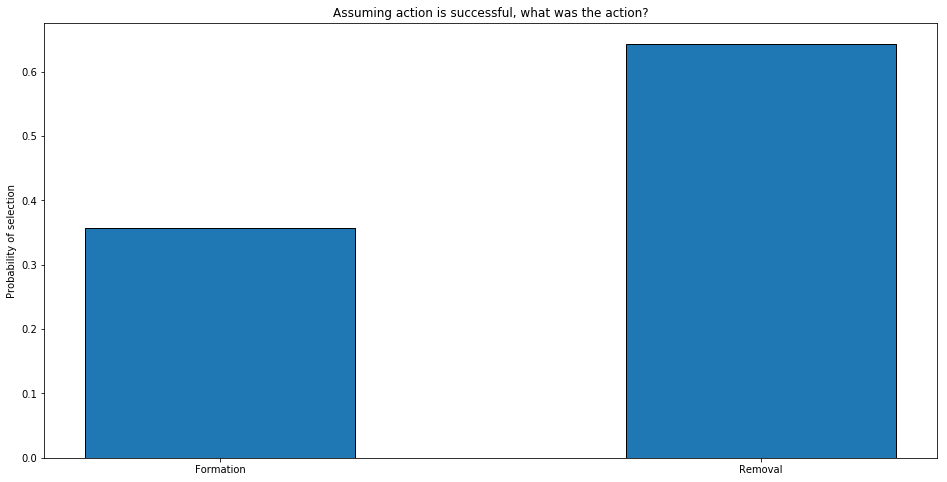

In [213]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
wombo_combo = np.concatenate((np.zeros(formations.shape[0]), np.ones(removals.shape[0])))
ax1.set_title("Assuming action is successful, what was the action?")
plt.xticks([0, 2], ["Formation", "Removal"])
ax1.set_ylabel("Probability of selection")
d = np.unique(wombo_combo*2)
ax1.hist(wombo_combo*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [99]:
# Plot selection counts per connection type

In [100]:
ff_formations = formations[formations[:,2] == 0]
lat_formations = formations[formations[:,2] == 1]

In [101]:
ff_removals = removals[removals[:,2] == 0]
lat_removals = removals[removals[:,2] == 1]

In [102]:
kek = [ff_formations, lat_formations, ff_removals, lat_removals]
silly_list = np.array([])
i=0
for k in kek:
    print k.shape
    silly_list = np.concatenate((silly_list, np.ones(k.shape[0]) * i))
    i += 1

(472L, 4L)
(0L, 4L)
(4037L, 4L)
(0L, 4L)


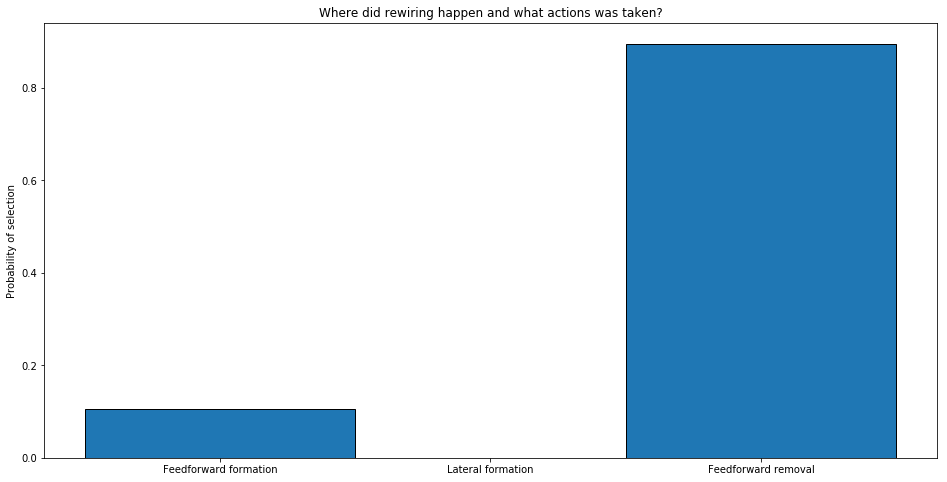

In [103]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Where did rewiring happen and what actions was taken?")
d = np.unique(silly_list)
plt.xticks(np.arange(np.max(d)+2), ["Feedforward formation", "Lateral formation", "Feedforward removal", "Lateral removal"])
ax1.set_ylabel("Probability of selection")
ax1.hist(silly_list, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)
plt.savefig("rewire_hist.png")

IndexError: too many indices for array

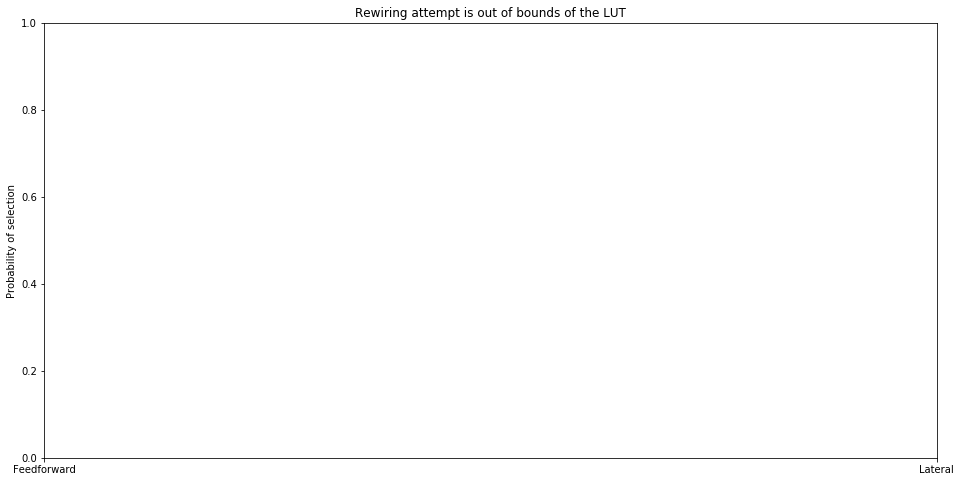

In [104]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Rewiring attempt is out of bounds of the LUT")
plt.xticks([0, 2], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(oob[:, 2]*2)
ax1.hist(oob[:, 2]*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [105]:
print "out of a total of", oob.shape[0], " occurances of oob, ", np.count_nonzero(oob[:, 2]==1), " have been from lateral connections"
print "that is",  np.count_nonzero(oob[:, 2]==1) * 100. / oob.shape[0], "%"

out of a total of 0  occurances of oob, 

IndexError: too many indices for array

In [106]:
ff_dists = np.sqrt(dist_sq_control[dist_sq_control[:, 1] == 0])[:, 0]
lat_dists = np.sqrt(dist_sq_control[dist_sq_control[:, 1] == 1])[:, 0]
print "dist_sq_control size", dist_sq_control.shape[0]
print "ff_dists size", ff_dists.shape[0]
print "lat_dists size", lat_dists.shape[0]
print "ff + lat dist size", ff_dists.shape[0] + lat_dists.shape[0]
# dist_sq_control

 dist_sq_control size 299965
ff_dists size 299965
lat_dists size 0
ff + lat dist size 299965


In [264]:
# combine presynaptic app with subpop
# f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
# combo = np.concatenate((lat_dists * 100, ff_dists))

# d = np.unique(combo)
# ax1.hist(combo, bins=np.arange(np.max(combo)+2)-.5, edgecolor='black')
# ax1.set_xlabel("Feedforward distances {:110s} Lateral distances".format(' '))
# plt.xticks(np.concatenate((np.unique(combo[combo < np.mean(combo)]), np.unique(combo[combo > np.mean(combo)]))), np.concatenate((np.unique(combo[combo < np.mean(combo)]), np.unique(combo[combo > np.mean(combo)])-np.min(combo[combo > np.mean(combo)]))))

NameError: name 'ff_dists' is not defined

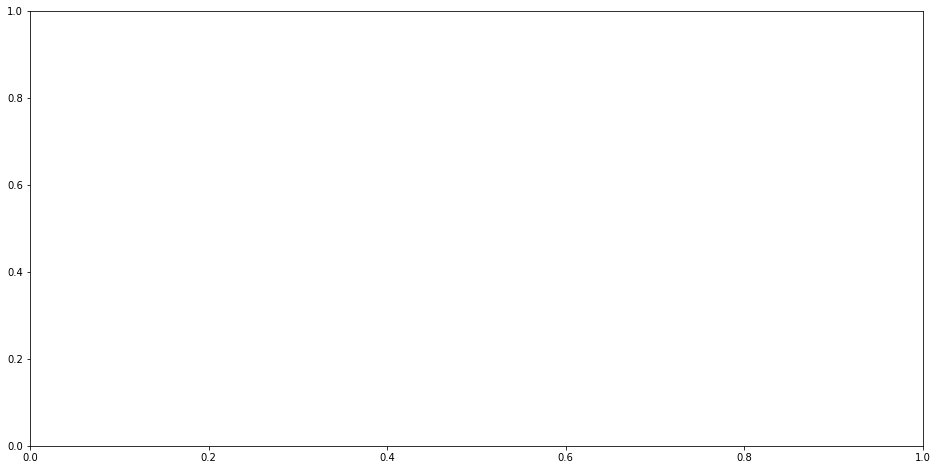

In [265]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(ff_dists)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(ff_dists, bins=d.size,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

NameError: name 'lat_dists' is not defined

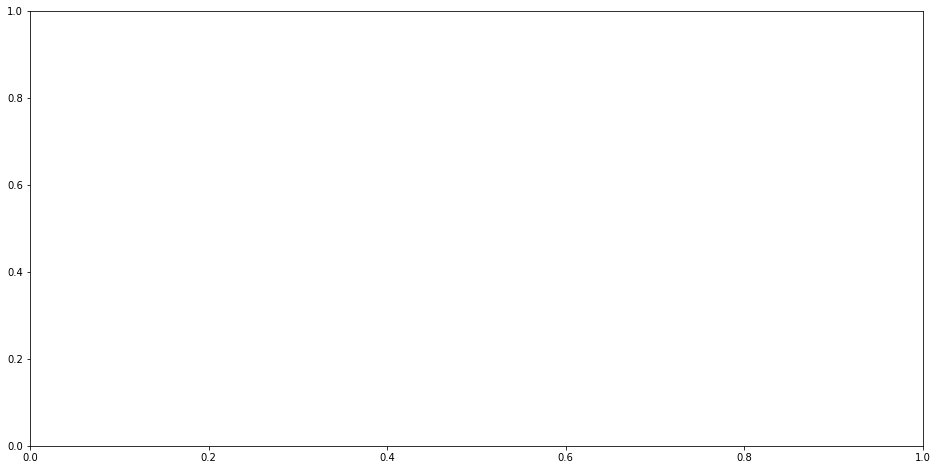

In [266]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(lat_dists)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(lat_dists, bins=d.size,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

IndexError: too many indices for array

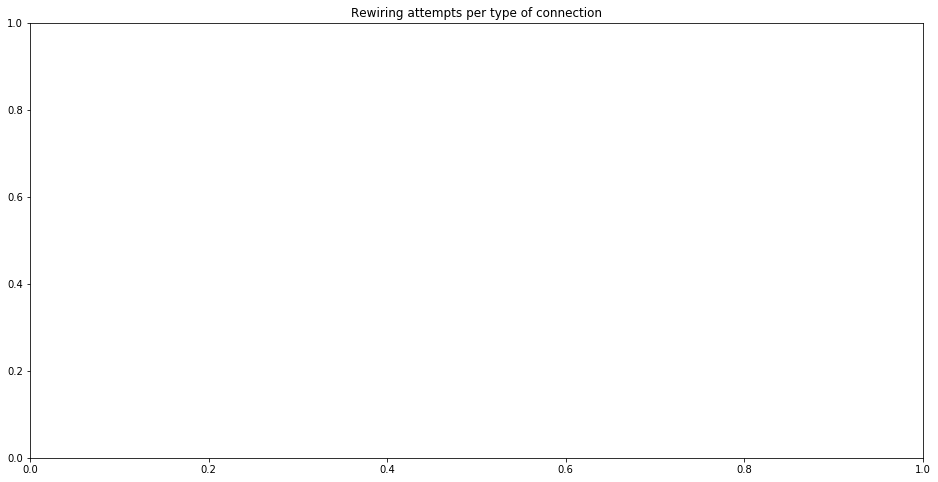

In [267]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Rewiring attempts per type of connection")
d = np.unique(sr_attempts[:,1])
plt.xticks(d+.5, ["Feedforward attempts", "Lateral attempts"])
ax1.set_ylabel("Probability of attempt")
ax1.hist(sr_attempts[:,1], bins=d.size, edgecolor='black', normed=True, range=(0, 2))

In [268]:
oob

array([], dtype=float64)

In [269]:
sr_attempts.shape[0]

0L

In [270]:
sr_attempts[:,2]

IndexError: too many indices for array

In [271]:
existence = np.zeros(2)

In [272]:
for e in sr_attempts[:,2]:
    existence[e] += 1

IndexError: too many indices for array

In [273]:
existence

array([ 0.,  0.])

In [274]:
plt.bar(existence)

TypeError: bar() takes at least 2 arguments (1 given)

In [46]:
# plot error appearance over time and show how rewires are affected by this
errors.keys()

['[ERROR]   (topographic_map_impl.c: 491): FAIL Search\n']

In [47]:
fail_times = errors['[ERROR]   (topographic_map_impl.c: 491): FAIL Search\n']

In [188]:
formations

array([[   157,    174,      1,      9],
       [   171,    170,      1,    329],
       [   174,    173,      1,   1796],
       ..., 
       [   165,    132,      0, 298469],
       [   164,    147,      1, 298851],
       [    80,    126,      1, 298880]])

(array([  1.,   1.,   5.,   2.,   5.,   3.,   4.,   3.,   7.,   5.,   6.,
          7.,   5.,  10.,  13.,  11.,   8.,  16.,  12.,   9.,  12.,   8.,
         13.,  15.,  14.,  14.,  19.,  15.,   8.,  13.,  13.,  17.,  19.,
         17.,  20.,  16.,  25.,  17.,  16.,  16.,  19.,  18.,  17.,  14.,
         25.,  14.,  19.,  27.,  27.,  21.,  21.,  25.,  22.,  27.,  26.,
         17.,  23.,  17.,  19.,  26.,  20.,  17.,  27.,  27.,  32.,  26.,
         18.,  27.,  27.,  24.,  29.,  31.,  26.,  31.,  26.,  22.,  26.,
         21.,  25.,  30.,  26.,  30.,  22.,  22.,  26.,  28.,  27.,  31.,
         23.,  30.,  35.,  35.,  23.,  18.,  26.,  30.,  27.,  21.,  34.,
         29.]),
 array([   85977.  ,   115102.63,   144228.26,   173353.89,   202479.52,
          231605.15,   260730.78,   289856.41,   318982.04,   348107.67,
          377233.3 ,   406358.93,   435484.56,   464610.19,   493735.82,
          522861.45,   551987.08,   581112.71,   610238.34,   639363.97,
          668489.6 ,   697

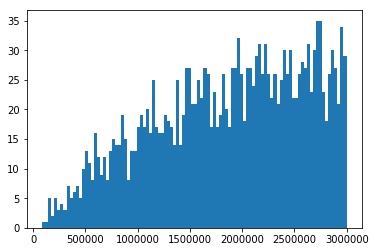

In [332]:
plt.hist(formations[:, -1], 3000000/30000)

(array([ 10.,  11.,   9.,   6.,   7.,   9.,  12.,   6.,  11.,   9.,  10.,
          5.,   8.,   5.,   8.,   6.,   8.,   4.,   4.,   8.,   7.,   4.,
          9.,   6.,  10.,  12.,  10.,   3.,  10.,   7.,   1.,   6.,  11.,
          9.,   3.,   7.,   8.,   8.,   5.,  13.,   6.,   7.,   6.,   6.,
          9.,   7.,   7.,  11.,   5.,  10.,  10.,   6.,   6.,   4.,   8.,
          8.,   2.,   7.,   4.,  10.,   4.,   3.,   7.,  11.,   4.,  11.,
          6.,   6.,   7.,  11.,   9.,   5.,  11.,   6.,   5.,   9.,   8.,
          9.,   5.,   4.,   9.,  10.,   8.,   7.,   7.,   7.,   7.,  12.,
          5.,   8.,   7.,   6.,   9.,   5.,   8.,   5.,   9.,   5.,   7.,
          8.,   7.,   7.,   8.,   7.,   7.,   2.,   6.,   6.,   5.,   8.,
          5.,   6.,  11.,   4.,   7.,   7.,   6.,   5.,   6.,   4.,   9.,
          3.,   2.,  10.,   3.,   5.,   6.,   5.,   6.,   6.,   6.,   5.,
          5.,   5.,   6.,   6.,   5.,   4.,   7.,   7.,   7.,   9.,   7.,
          4.,   8.,   7.,  11.,   6., 

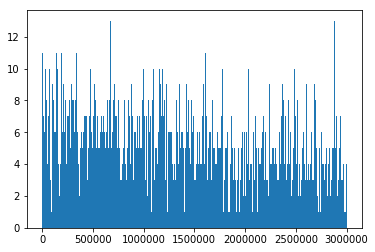

In [333]:
plt.hist(removals[:, -1], 30000000/30000)

(array([ 323.,  290.,  269.,  268.,  257.,  230.,  292.,  234.,  252.,
         245.,  234.,  243.,  233.,  261.,  256.,  255.,  265.,  232.,
         253.,  248.,  263.,  230.,  249.,  261.,  235.,  265.,  231.,
         252.,  217.,  272.,  234.,  257.,  255.,  252.,  240.,  253.,
         235.,  253.,  214.,  242.,  259.,  254.,  247.,  268.,  256.,
         253.,  259.,  257.,  264.,  248.,  254.,  247.,  222.,  234.,
         235.,  235.,  228.,  256.,  282.,  223.,  234.,  268.,  240.,
         252.,  237.,  238.,  245.,  245.,  250.,  255.,  235.,  232.,
         271.,  257.,  274.,  268.,  270.,  266.,  247.,  240.,  236.,
         246.,  203.,  265.,  237.,  241.,  245.,  255.,  231.,  238.,
         237.,  246.,  265.,  234.,  244.,  254.,  242.,  237.,  232.,  239.]),
 array([  3.10000000e+01,   3.03067000e+03,   6.03034000e+03,
          9.03001000e+03,   1.20296800e+04,   1.50293500e+04,
          1.80290200e+04,   2.10286900e+04,   2.40283600e+04,
          2.70280300e+04

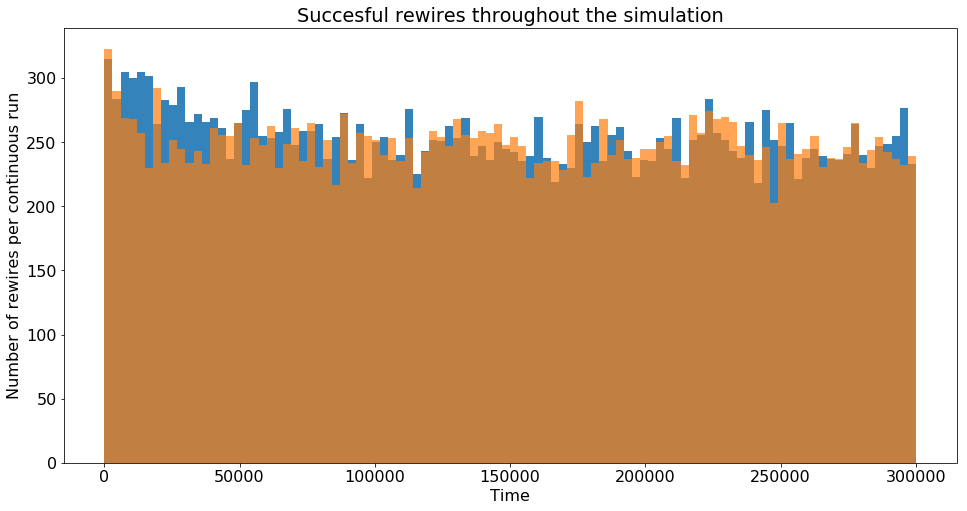

In [656]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Time")
ax1.hist(removals[:, -1], int(3000000/30000), alpha=.9)
ax1.hist(formations[:, -1], int(3000000/30000), alpha=.7)

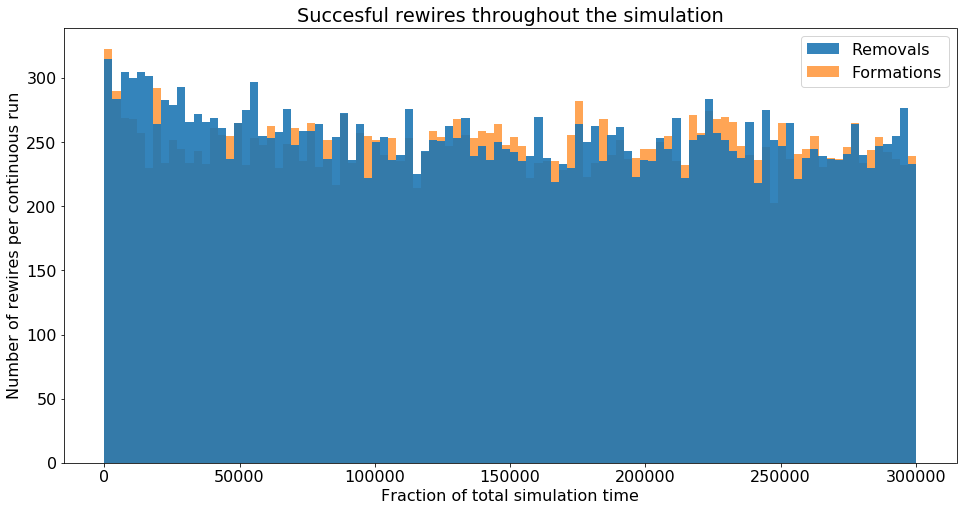

In [658]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Fraction of total simulation time")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[:, -1]  , int(300000/3000), alpha=.9, zorder=10, label="Removals")
ax1.hist(formations[:, -1], int(300000/3000), alpha=.7, zorder=9, label="Formations")
# ax1.hist(fail_times,        int(3000000/30000),color='r', zorder=10, alpha=.7, label="Failures")
# ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1, l1, loc='best')
plt.savefig('succesful_rewires.png')

In [56]:
sr_attempts.shape[0] // 30000

0L

In [57]:
sr_attempts

array([], dtype=float64)

In [58]:
sr_attempts[:,0]

IndexError: too many indices for array

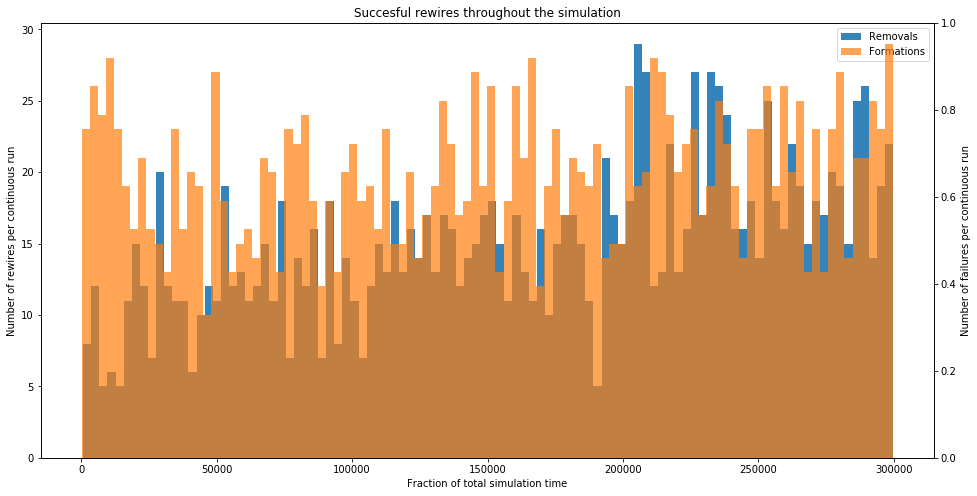

In [59]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Fraction of total simulation time")
ax1.set_zorder(2)
ax2 = ax1.twinx()
ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[removals[:,2]==0][:, -1]  , int(3000000/30000), alpha=.9, zorder=8, label="Removals")
ax1.hist(formations[formations[:,2]==0][:, -1], int(3000000/30000), alpha=.7, zorder=9, label="Formations")
# ax2.hist(fail_times, int(30000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')
plt.savefig('succesful_rewires_ff.png')

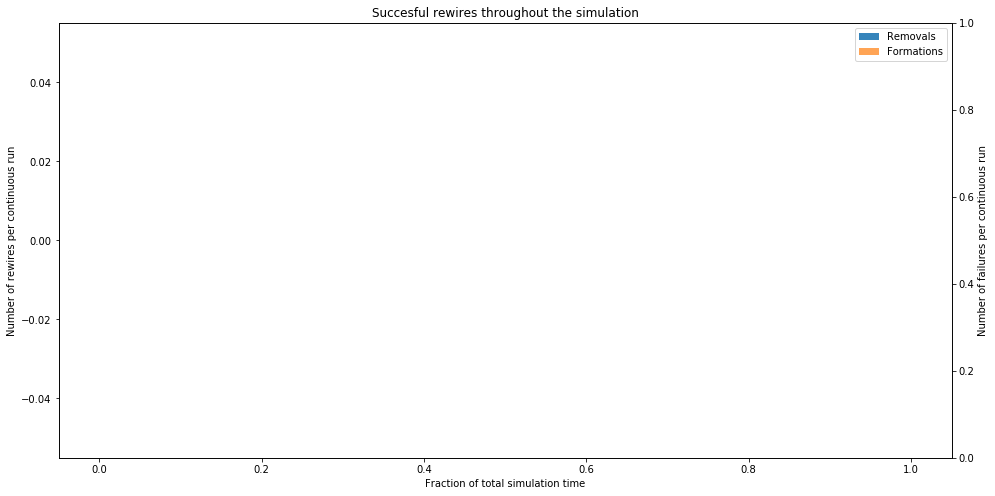

In [60]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Fraction of total simulation time")
ax1.set_zorder(2)
ax2 = ax1.twinx()
ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[removals[:,2]==1][:, -1]  , int(3000000/30000), alpha=.9, zorder=8, label="Removals")
ax1.hist(formations[formations[:,2]==1][:, -1], int(3000000/30000), alpha=.7, zorder=9, label="Formations")
# ax2.hist(fail_times, int(30000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')
plt.savefig('succesful_rewires_lat.png')

In [680]:
removals

array([[     74,      78,       0,     118],
       [    184,     119,       0,     185],
       [     27,      58,       0,     245],
       ..., 
       [    207,     160,       0, 2998913],
       [     51,     129,       0, 2999005],
       [    247,     250,       0, 2999142]])

In [682]:
removals[removals[:,2]==1]

array([[     59,      60,       1,     813],
       [     51,      67,       1,     817],
       [     91,      75,       1,     944],
       ..., 
       [    120,     137,       1, 2997436],
       [    205,     222,       1, 2997541],
       [    236,     221,       1, 2997729]])